PCA(Principal Component Analysis)
- 가장 대표적인 차원 축소 기법
- 여러 변수 간에 존재하는 상관관계를 이용해 
    - 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- 기존 데이터의 정보 유실이 최소화하도록 함
- 그러기 위해서는 **가장 높은 분산을 가지는 데이터의 축**을 찾아
    - 이 축으로 차원으로 축소하는데, 이것이 PCA의 주성분이 됨
- 즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주


예: 키와 몸무게 2개의 피처를 가지고 있는 데이터 세트
- 2개의 피처를 한 개의 주성분을 가진 데이터 세트로 차원 축소
- 데이터 변동성이 큰 방향으로 축을 생성하고
- 새롭게 생성된 축으로 데이터를 투영하는 방식

PCA 차원 축소 방식
- 제일 먼저 가장 큰 데이터 변동성(Variance)을 기반으로
- 첫 번째 벡터 축을 생성하고
- 두 번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 함
- 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 생성
- 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 
- 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소됨

### PCA 예제1

- 붓꽃 데이터 세트 사용
- 4개의 속성(피처) : sepal length, sepal width, petal length, petal width
- PCA 사용 차원 축소 : 4개의 속성을 2개의 PCA 차원으로 압축
- 원본 데이터 세트와 압축된 데이터 세트 차이점 확인


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**sepal_length, sepal_width 두개의 속성으로 데이터 산포 시각화**

Text(0.5, 0, 'sepal length')

Text(0, 0.5, 'sepal width')

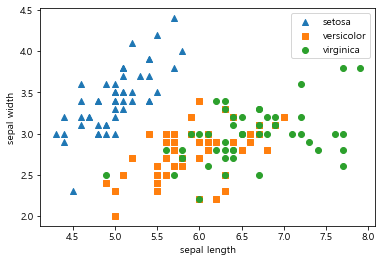

In [7]:
markers = ['^', 's', 'o']
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()


#### 그래프 해석
- Setosa인 경우 sepal width가 대부분 3.0보다 크고 sepas length가 6.0 이하인 곳에 일정하게 분포
- Versicolor와 Virginica는 겹치는 부분이 존재
- sepal width와 sepal length 조건만으로는 분류가 어려운 복잡한 조건
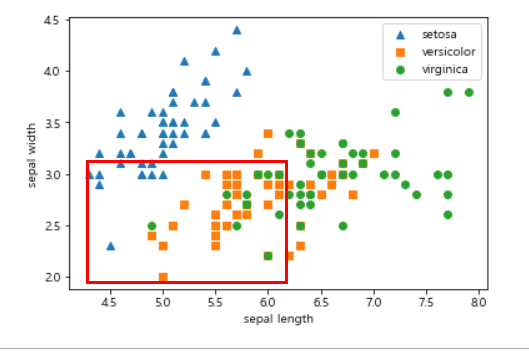

#### 4개의 피처를  2개로 압푹
- 2개의 pca 속성으로 품종 분포 시각화

- PCA는 개별 속성 스케일링 변환 작업 필요
    - PCA는 여러 속성의 값을 연산해야 하므로 속성 스케일에 큰 영향을 받음
    - 평균이 0이고 분산이 1인 표준 정규분포로 변환하는 것이 일반적

In [9]:
# 평균이 0 분산이 1인 분포로 변환
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [12]:
iris_scaled.shape
iris_scaled[:5]

(150, 4)

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

**PCA 변환 수행**


스케일링이 적용된 데이터 세트에 PCA 적용
- 4차원(4개의 속성)의 붓꽃 데이터를 2차원(2개의 PCA 속성) PCA 데이터로 변환
- 사이킷런의 PCA 클래스 사용
- n_components 파라미터 : PCA로 변환할 차원의 수
- fit()/transform() 호출해서 PCA 변환 수행


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 변환할  차원의 수

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape) ## 2차원 변환

PCA(n_components=2)

(150, 2)


In [30]:
# DF 로 변환

pca_columns = ['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)


,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


Text(0.5, 0, 'pca_component_1')

Text(0, 0.5, 'pca_component_2')

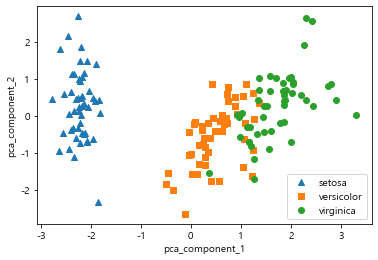

In [31]:

markers = ['^','s','o']
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현

for i, marker in enumerate(markers) :
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data, marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()


### 그래프 해석
- pca_cmponent_1 축을 기반으로 Setosa 품종은 명확하게 구분 가능
- Versicolor와 Virginica는 서로 겹치는 부분 일부 존재하지만 비교적 잘 구분됨
- PCA의 첫번 새로운 축인 pca_compnent_1 원본데이터의 변동성을 비교적 잘 반영했으므

**각 PCA Component별 변동성 비율**

PCA Component별로 원본 데이터의 변동성 반영 정도 확인  
PCA 객체의 explained_variance_ration_ 속성  
- 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공


In [34]:
print(pca.explained_variance_ratio_)
#pca 2개 요소만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있음

[0.72962445 0.22850762]


**원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교**

원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에  
각각 분류 알고리즘을 적용한 후 결과 비교  
Estimator는  RansdomForestClassifier 이용  
cross_val_score() 이용 3개의 교차 검증 세트로 정확도 결과 비교


In [35]:
# 원본 붓꽃 데이터에 랜덤 포레스트 알고리즘 적용한 결과

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


In [37]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도 :', scores)
print('원본 데이터 평균 정확도 : ', np.mean(scores))

원본 데이터 교차 검증 개별 정확도 : [0.98 0.94 0.96]
원본 데이터 평균 정확도 :  0.96


In [38]:
### pca 데이터를 사용해서 학습 분류
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('pca 데이터 교차 검증 개별 정확도 :', scores_pca)
print('pca 데이터 평균 정확도 : ', np.mean(scores_pca))

pca 데이터 교차 검증 개별 정확도 : [0.88 0.88 0.88]
pca 데이터 평균 정확도 :  0.88


### 결과
- 원본 데이터 대비 예측 정확도는 8~10% 정도 하락
- 4개 속성이 2개의 변환으로 속성이 감소하면서 예측성능이 하랄함 (피처가 많지 않은 상황이었음)
- 10% 정확도 하락은 비교적 큰 성능 수치의 감소지만
    - 변수가 50% 감소한 것을 고려하면
    - PCA 변환후에도 원본 데이터의 특성을 상당 부분 유지하고 있음

### PCA 예제 2

신용카드 데이터 세트 PCA 변환
좀 더 많은 피처를 가진 데이터 세트를
적은 PCA 컴포넌트 기반으로 변환한 뒤
예측 영향도가 어떻게 되는지
변환된 PCA 데이터 세트에 기반해서 비교


- 사용 데이터 : UCI Machine Learning Repository에 있는
- 신용카드 고객 데이터 세트 (Credit Card Clients Data Set)
- https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
- Data Folder
- default of credit card clients.xls
- pca_credit_card.xls로 변경


In [41]:
# 데이터 로드 및 컬럼명 변환

# 첫행과 1열은 의미없는 데이터 -제거
df = pd.read_excel('./data/pca_credit_card.xls', sheet_name='Data',  header=1).iloc[0:,1:]
df.shape
df.head(3)
# default payment next month 속성 : target 값
# - 다음달 연체 여부
# - 연체 : 1
# - 정상 납부 : 0

(30000, 24)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [42]:
# 컬럼명 변경
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)

# 타겟 변수 저장
y_target = df['default']
X_features = df.drop('default', axis=1)

In [43]:
# target값 확인
y_target.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [44]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

**피처간 상관도 시각화**
- corr() 이요해  상관도 구한 뒤 heatmap으로 시각화

<Figure size 1440x1296 with 0 Axes>

<AxesSubplot:>

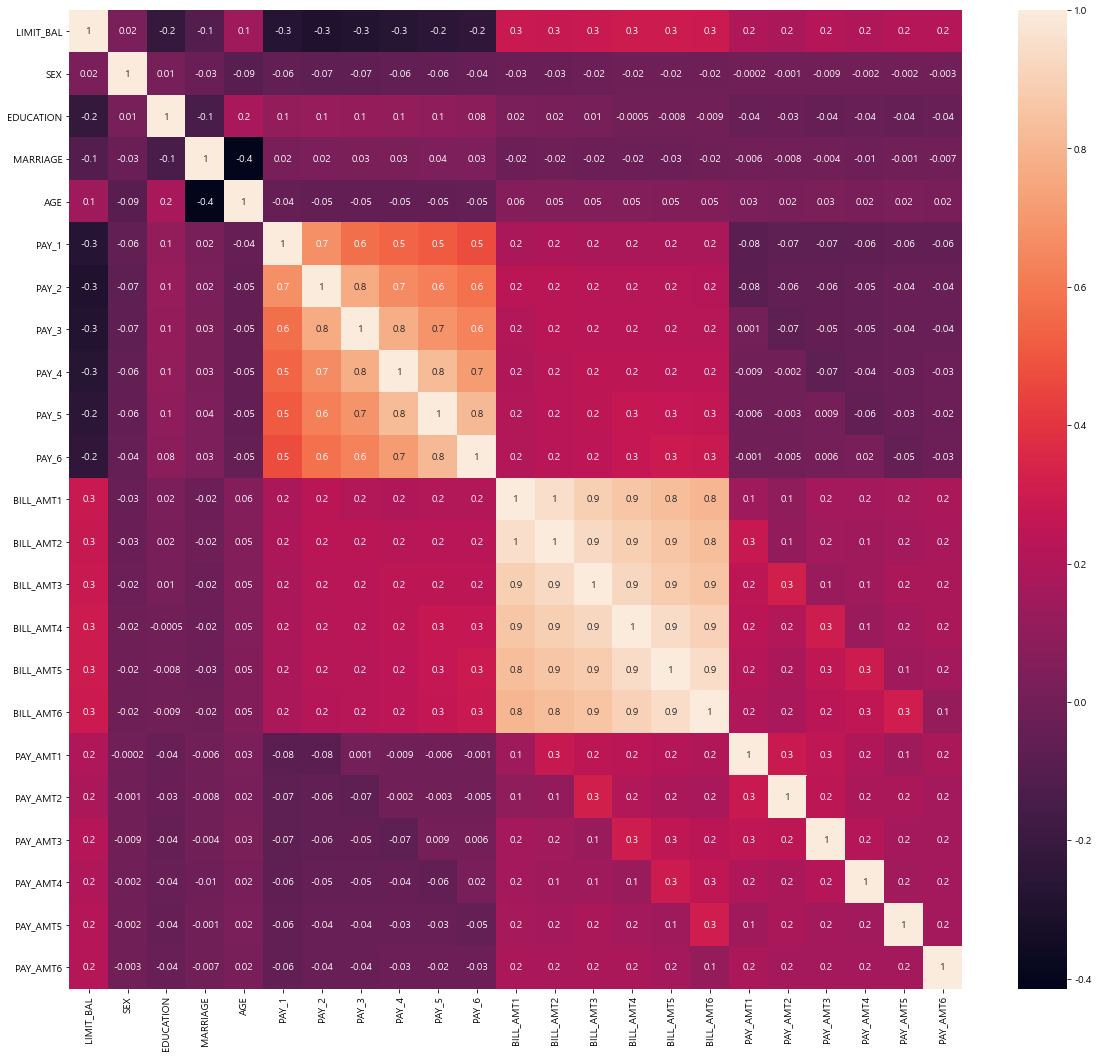

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,18))

corr  = X_features.corr()
sns.heatmap(corr, annot=True, fmt='.1g')
# 참고 g : greater than o (0.00 없음)
# .1f 하면 : 0.00 있음


In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 속성명 생성
cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
print('대상 속성명 : ', cols_bill)

대상 속성명 :  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [49]:
# 스케일링 변환 작업
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

In [50]:
# PCA 적용
pca = PCA(n_components=2) # 6컬럼 >>> 2컬럼 축소
pca.fit_transform(df_cols_scaled)

array([[-1.61114812,  0.01247912],
       [-1.54759523, -0.06234401],
       [-1.03587378,  0.01125622],
       ...,
       [-1.19551872, -0.3595072 ],
       [-0.00829343, -0.04995798],
       [-0.25828552,  0.26525237]])

In [51]:
# 변동성 확인
print('PCA Component별 변동성:', pca.explained_variance_ratio_)


PCA Component별 변동성: [0.90555253 0.0509867 ]


### 결과 
- 2개의 컴포넌트  6개의  속성의 변동성을 약 95%이상  설명함
- 첫번째  PCA축으로 90%의 변동성을 수용함 >> 6개 컬럼의 상관도가 매우 높음

### 분류 예측 성능 비교
1. 원본 데이터셋
2. 컴포넌트로 PCA 변환한 데이터셋

In [56]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))


CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [59]:
# PCA 데이터 세트의 분류 예측 성능 측성
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 compenent를 가진 PCA 변환 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)

# cross_val_score( )로 분류 예측 수행 
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))


CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7914 0.7969 0.8024]
PCA 변환 데이터 셋 평균 정확도:0.7969
